In [1]:
from gensim.models import Word2Vec

In [2]:
from konlpy.tag import Komoran

In [3]:
def read_review(filename):
    f = open(filename,'r',encoding = 'utf-8')
    data = []
    for line in f.readlines():
        if line != '':
            data.append(line.split('\t'))
    data = data[1:]
    f.close()
    return data         

In [4]:
data = read_review('ratings.txt')
len(data)

200000

In [5]:
komoran = Komoran()
docs = []
for sent in data:
    docs.append(komoran.nouns(sent[1]))
print(docs[:10])

[['때'], ['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '사실', '우리나라', '시절', '끝', '열정', '노라', '노', '전통', '사람', '꿈', '수', '것', '감사'], ['폴리스', '스토리', '시리즈', '뉴', '최고'], ['연기', '것', '라고', '생각', '몰입', '영', '화지'], ['안개', '밤하늘', '초승달', '영화'], ['사랑', '사람', '처음', '끝', '수', '영화'], ['완전', '감동', '감동'], ['개들의 전쟁', '빠'], ['굿'], ['바보', '병', '인', '듯']]


In [6]:
model = Word2Vec(sentences = docs, vector_size = 200, window = 4, hs = 1, min_count = 5, sg = 1)

In [7]:
model.wv.most_similar('배우',topn = 5)

[('연기자', 0.6717306971549988),
 ('문신', 0.6642976999282837),
 ('다나와', 0.6479758620262146),
 ('최송현', 0.6443096995353699),
 ('조연', 0.6397704482078552)]

## 단어 임베딩의 의미
* 단어의 위치에 기반하여 의미를 내포하는 밀집벡터를 생성한다
    * 이때, 비슷한 위치에 나타나는 단어들은 비슷한 벡터를 가지게 된다.
        * Word Analogy
        * 따라서 단어 간의 유사성 계산이 가능하고 이를 이용해서 연산도 가능하다.

# FastText 학습
* 파라미터는 from gensim.models import Word2Vec과 동일하다.

In [8]:
from gensim.models import FastText
model_fasttext = FastText(sentences = docs, vector_size = 200, hs = 1, negative = 0, min_count = 5, sg = 1, window = 4)

In [9]:
print(model_fasttext.wv.most_similar('배우',topn = 5))
print(model_fasttext.wv.most_similar('이정재', topn = 5))
print(model_fasttext.wv.most_similar('감동',topn = 5))

[('조연', 0.5608417391777039), ('엑스트라', 0.5465080738067627), ('문신', 0.536482572555542), ('단역', 0.5142711400985718), ('윤제문', 0.5138006806373596)]
[('이정현', 0.6007369160652161), ('김혜수', 0.5757822394371033), ('이미숙', 0.5659373998641968), ('김민', 0.5653944611549377), ('허준호', 0.563360333442688)]
[('트릭', 0.4262389540672302), ('교훈', 0.4171827733516693), ('긴장도', 0.4109379053115845), ('억지웃음', 0.3830741047859192), ('반감', 0.3806880712509155)]


In [11]:
words = list(model.wv.index_to_key)
words[:10]

['영화', '것', '점', '연기', '수', '거', '평점', '최고', '생각', '때']

In [13]:
model.wv.index_to_key[:10]

['영화', '것', '점', '연기', '수', '거', '평점', '최고', '생각', '때']

In [17]:
fasttext_embedding = model_fasttext.wv['영화'] # FastText의 임베딩 결과

In [18]:
Word2Vec_embedding = model.wv['영화'] # Word2Vec의 임베딩 결과

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
cosine_similarity(fasttext_embedding.reshape(1,-1),Word2Vec_embedding.reshape(1,-1))

array([[0.01280251]], dtype=float32)

# Glove로 사전 학습된 단어 임베딩

In [1]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-50') #Global vectors for word representation

In [2]:
vec_king = wv['king']

In [3]:
vec_king

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

##  두 단어 간의 유사도 계산

In [4]:
wv.similarity('king','man')

0.53093773

## most_similar에서 positive와 negative parameter를 이용해서 word analogy 계산하기

In [5]:
# 여성 , 왕에는 가까우면서 남성과는 먼 단어
wv.most_similar(positive = ['woman','king'],negative = ['man'], topn = 5)

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904)]

In [6]:
wv.doesnt_match(['morning','night','snowman'])

'snowman'

### wv.distance를 사용해서 단어간의 거리가 얼마나 먼지 확인하기

In [36]:
wv.distance('cat','dog')

0.07819950580596924

In [38]:
wv.n_similarity(['bulgogi','shop'],['japanese','restaurant'])

0.53752255

In [39]:
wv.n_similarity(['bulgogi','shop'],['korean','restaurant'])

0.5627309

# RNN을 이용하여 문서분류 하기
### RNN에 문장을 넣어 생기는 최종 hidden state를 이용하여 문장을 분류한다.
* **이를 위해서 RNN에 문장을 넣어야 하고 이과정에서 one-hot encoding과 embedding이 필요하다**

In [7]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/sjlee/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [9]:
from nltk.corpus import movie_reviews

# movie review data에서 file id를 가져온다
fileids = movie_reviews.fileids()

# file id를 이용해 raw text file을 가져온다.
reviews = [movie_reviews.raw(fileid) for fileid in fileids]

# file id를 이용해 label로 사용할 category
# 즉 positive와 negative 정보를 순서대로 가져온다.
# 각 file마다 positive인 file이 있고 negative인 파일이 있기 때문에
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]
print('# of sentence',len(reviews),'# of labels',len(categories))


# of sentence 2000 # of labels 2000


In [12]:
movie_reviews.categories(fileids[0])

['neg']

## from tensorflow.keras.preprocessing.text import Tokenizer를 이용해서 텍스트 토큰화하기

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

np.random.seed(7)
tf.random.set_seed(7)

# 사용할 단어의 수
max_words = 10000

# num_words 지정을 통해 빈도가 높은 num_words개의 단어를 이용해서 단어집합을 구성한다.
# oov_token의 지정을 통해 oov 토큰에 대한 처리를 어떻게 할지 지정
tokenizer = Tokenizer(num_words = max_words, oov_token = 'UNK')

# fit_on_texts: 코퍼스 제공을 통해 단어집합을 생성한다.
tokenizer.fit_on_texts(reviews)

X = tokenizer.texts_to_sequences(reviews)
print(X[:1],"\n")
print(len(X[:1][0]))

[[98, 77, 949, 4622, 131, 6, 3, 2016, 789, 3764, 4, 103, 1314, 37, 73, 56, 25, 1341, 24, 5, 2, 519, 1325, 17, 14, 678, 1571, 6, 84, 55, 8, 34, 90, 4, 33, 4477, 604, 2, 638, 242, 2, 27, 4, 8854, 190, 41, 2186, 3, 302, 6462, 27, 13, 2, 949, 1458, 9, 2402, 20, 3, 80, 691, 362, 17, 1768, 10, 8, 3, 80, 106, 3980, 46, 7, 49, 143, 15, 466, 25, 57, 3668, 24, 6, 1175, 195, 19, 1342, 8855, 96, 46, 527, 6, 831, 2, 7098, 903, 12, 170, 363, 4, 118, 342, 4204, 8856, 17, 53, 21, 62, 4, 106, 753, 5, 243, 36, 2695, 5, 96, 4, 113, 1879, 51, 249, 1, 15, 24, 6180, 37, 250, 6, 32, 625, 15, 272, 3765, 1224, 17, 2795, 10, 2284, 40, 49, 21, 2, 470, 12, 2, 27, 78, 65, 349, 354, 7, 9, 38, 322, 89, 7840, 10, 437, 88, 1315, 17, 103, 1, 56, 15, 1446, 146, 8, 46, 35, 11, 25, 162, 1123, 32, 60, 362, 604, 160, 20, 53, 21, 1077, 53, 21, 82, 505, 136, 29, 2, 329, 53, 21, 486, 28, 178, 39, 2, 329, 53, 21, 770, 1, 53, 21, 1, 53, 21, 3, 1, 5, 911, 115, 53, 21, 5278, 5, 1387, 172, 9, 633, 4, 64, 5, 10, 7, 322, 26, 1958, 14

In [56]:
print("Index of plot", tokenizer.word_index['plot'])

Index of plot 98


## RNN 입력 준비1
## 케라스의 pad_sequences를 이용해서 인풋의 길이를 일정하게 변환한다.

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# 문서의 입력 단어 수를 제한
maxlen = 500
# pad_sequences
# maxlen : 문서의 단어수가 maxlen보다 많으면 잘라내고 적으면 0으로 padding
# truncating: 'pre'를 사용하면 앞을 자를 수 있고 뒤를 자르고자 하면 'post'로 선택

X = pad_sequences(X,maxlen = 500, truncating = 'pre')

In [64]:
X[:10]

array([[ 911,  115,   53, ..., 3865, 1023,  303],
       [   0,    0,    0, ...,    5,    3,   27],
       [   0,    0,    0, ...,   30,   36, 4625],
       ...,
       [  74,  373,  195, ..., 3439,   13,   10],
       [   1,   20,    2, ..., 2449,    6,  506],
       [ 573,   10,  150, ..., 8340, 1906,  303]], dtype=int32)

In [62]:
categories[:10]

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']

In [61]:
# 카테고리를 target 1,0으로 변환시켜줘야 한다.
label_dict = {'pos':1,'neg':0}
y = np.array([label_dict[c] for c in categories])
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)
print(len(X_train))
print(len(X_test))

1600
400


## 연습1 일반적인 신경망 모형을 이용한 분류

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
model = Sequential([
    Embedding(max_words, 32, input_length = maxlen),
    # (one-hot encoding 크기, Dense 벡터 크기, input Vector의 사이즈)
    Flatten(), # 2차원 행렬을 1차원 벡터로 변환
    # Tensorflow는 input의 크기를 처음에만 지정해주고 이후에는 지정하지 않아도 됨
    # 1은 output의 크기
    Dense(1, activation = 'sigmoid')
])
model.summary()

2023-12-01 01:58:34.932239: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 01:58:34.940802: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train,y_train,
                    epochs = 10, validation_split = 0.2)
# 학습 데이터에 대해 학습을 진행하는데, 
# 이때 validation_split을 지정해 검증 데이터 셋을 만든다.
score = model.evaluate(X_test,y_test)

Epoch 1/10
40/40 [==============================] - 2s 16ms/step - loss: 0.6914 - acc: 0.5156 - val_loss: 0.6887 - val_acc: 0.5312
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6134 - acc: 0.8703 - val_loss: 0.6814 - val_acc: 0.5594
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5097 - acc: 0.9633 - val_loss: 0.6661 - val_acc: 0.5813
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.3776 - acc: 0.9844 - val_loss: 0.6438 - val_acc: 0.6438
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2492 - acc: 0.9937 - val_loss: 0.6211 - val_acc: 0.6656
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1492 - acc: 0.9984 - val_loss: 0.6104 - val_acc: 0.6750
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0840 - acc: 1.0000 - val_loss: 0.6022 - val_acc: 0.6750
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0454 - acc: 1.0

In [69]:
score

[0.6371960043907166, 0.6700000166893005]

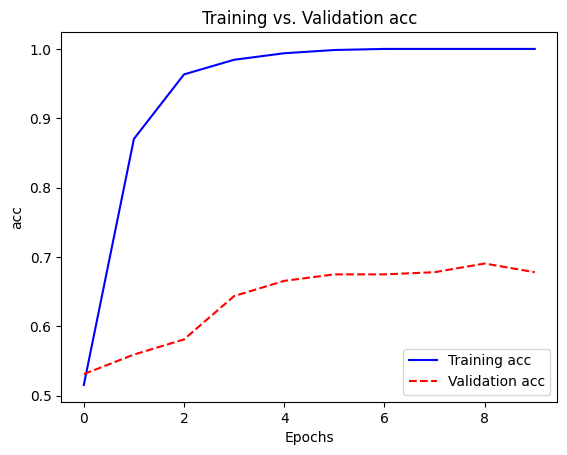

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

## RNN을 이용한 문서 분류

In [71]:
X_train

array([[   2,  377,  443, ..., 2854,    2, 1884],
       [   4, 6468, 5956, ...,    6,  128,  146],
       [   0,    0,    0, ...,   15,    7,    1],
       ...,
       [   5,    1,   17, ...,    6,  750, 1793],
       [   0,    0,    0, ...,    2,  340,  231],
       [   4,    2,  318, ..., 2219,  217,  101]], dtype=int32)

In [75]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Embedding(max_words,32),
    # onehot encoding size, dense vector size
    # Flat하게 만드는 대신 RNN모형을 사용
    SimpleRNN(32),
    Dense(32, activation  = 'relu'),
    Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323169 (1.23 MB)
Trainable params: 323169 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


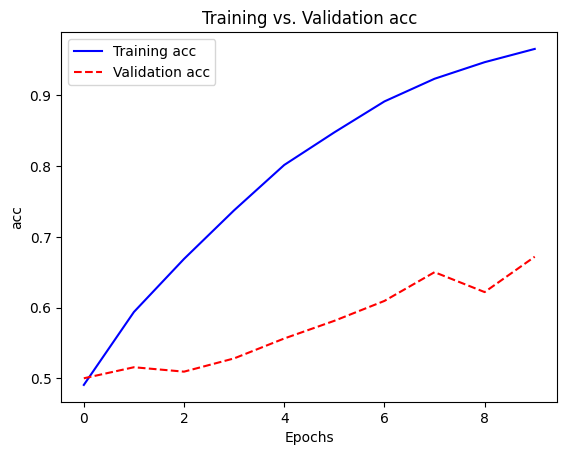

In [76]:
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')

In [77]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 9ms/step - loss: 0.6165 - acc: 0.6625


[0.6164679527282715, 0.6625000238418579]